In [1]:
using Plots
using LaTeXStrings
using LinearAlgebra
using DataFrames

In [2]:
#Integrador de metodos 
#Method es el metodo a integrar (Euler, RK2 o RK4)
#f es la función tal que y'=f(y,t)
#y0 es el valor inicial dado y(a)
#(a,b) es el intervalo para el cual quiero calcular la grilla de valores de y(a+i*h) (aproximadamente)
#N es la cantidad de puntos que tengo a,a+ih,...,b (N-1 es la cantidad de intervalos entre a y b)
#p es el vector de los parametros (en caso de utilizarlos), que definen a f
function Integrador(Method,f,y0,(a,b),N)
    h=(b-a)/(N-1) #Espaciamiento entre puntos
    w=zeros(N) #Vector de las aproximaciones de y (desde a hasta b)
    t=zeros(N) #Vector de los valores de la forma a+i*h (hasta b)
    w[1]=y0 #El primer valor de w es exacto (dado por el problema)
    t[1]=a #Primer valor de t
    for i in 2:N
        t[i]=t[i-1]+h #Paso de los t
        w[i]=Method(f,w[i-1],t[i-1],h) #Uso el metodo N-1 veces
    end
    return (t[:],w[:]) #Devuelve los vectores de los t y las aproximaciones de y(t) (w(t))
end
#Con parámetros
function Integradorp(Method,f,y0,(a,b),N,p)
    h=(b-a)/(N-1) #Espaciamiento entre puntos
    w=zeros(N) #Vector de las aproximaciones de y (desde a hasta b)
    t=zeros(N) #Vector de los valores de la forma a+i*h (hasta b)
    w[1]=y0 #El primer valor de w es exacto (dado por el problema)
    t[1]=a #Primer valor de t
    for i in 2:N
        t[i]=t[i-1]+h #Paso de los t
        w[i]=Method(f,w[i-1],t[i-1],h,p) #Uso el metodo N-1 veces
    end
    return (t[:],w[:]) #Devuelve los vectores de los t y las aproximaciones de y(t) (w(t))
end

Integradorp (generic function with 1 method)

In [3]:
#Runge-Kutta de orden 4 (un paso)
function RK4(f,y0,t0,h) #Runge-Kutta de orden 4 sin parametros
    k1=h*f(y0,t0)
    k2=h*f(y0+0.5*k1,t0+h*0.5)
    k3=h*f(y0+0.5*k2,t0+h*0.5)
    k4=h*f(y0+k3,t0+h)
    return y0+(k1+2*k2+2*k3+k4)/6
end
function RK4p(f,y0,t0,h,p) #Runge-Kutta de orden 4 con parametros
    k1=h*f(y0,t0,p)
    k2=h*f(y0+0.5*k1,t0+h*0.5,p)
    k3=h*f(y0+0.5*k2,t0+h*0.5,p)
    k4=h*f(y0+k3,t0+h,p)
    return y0+(k1+2*k2+2*k3+k4)/6
end

RK4p (generic function with 1 method)

In [ ]:
f(y,t,p)=(p[1]*cos(t)+p[2])*y-y^3
y0=0.10
I=[0.0,200.0]
N=10000
p=[1,5]

In [ ]:
T,M=Integradorp(RK4p,f,y0,I,N,p)

In [ ]:
scatter(T,M)

In [17]:
g(y,t)=-3*y+t+exp(-2t)
y0=0.10
I=[1.0,3.0]
N=100

100

In [18]:
A,B=Integrador(RK4,g,y0,I,N)

([1.0, 1.02020202020202, 1.0404040404040402, 1.0606060606060603, 1.0808080808080804, 1.1010101010101006, 1.1212121212121207, 1.1414141414141408, 1.1616161616161609, 1.181818181818181  …  2.818181818181819, 2.838383838383839, 2.8585858585858595, 2.87878787878788, 2.8989898989899, 2.9191919191919204, 2.939393939393941, 2.959595959595961, 2.9797979797979814, 3.0000000000000018], [0.1, 0.11652084891347855, 0.13236323804338834, 0.147571140991161, 0.16218578403771536, 0.17624581409402063, 0.18978745652205545, 0.2028446634318669, 0.21544925302441803, 0.22763104051602948  …  0.8307471123305478, 0.837404694127498, 0.8440640580644404, 0.8507252067366896, 0.8573881383342027, 0.8640528470690438, 0.8707193235710426, 0.8773875552537811, 0.8840575266529073, 0.8907292197386468])

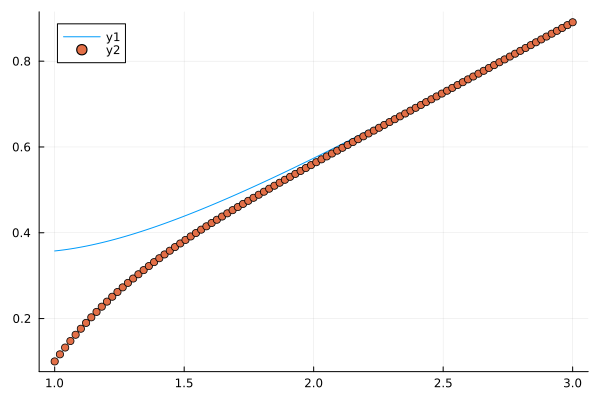

In [21]:
s(t)=(3*t-1)/9+exp(-2*t)
t=range(1,3,length=200)
plot(t,s)
scatter!(A,B)